# TruFor results analysis
Small notebook to compute the splicing analysis results for TruFor.

## Libraries import

In [151]:
import os
import glob
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import PIL.Image as Image
import cv2
from tqdm.notebook import tqdm
mpl.use("pgf")
pgf_with_rc_fonts = {
    "font.family": "serif",
    "font.serif": [],                   # use latex default serif font
    "font.sans-serif": ["DejaVu Sans"], # use a specific sans-serif font
}
mpl.rcParams.update(pgf_with_rc_fonts)
import matplotlib.pyplot as plt
fontsize = 18
plt.rc('text', usetex=True)
plt.rc('font', family='sans',size=fontsize)
plt.rc('legend',fontsize=fontsize)
plt.rc('xtick',labelsize=fontsize)
plt.rc('ytick',labelsize=fontsize)
plt.rc('axes',labelsize=fontsize,titlesize=fontsize)
plt.rc('lines',linewidth=2)
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

## Execution params

In [137]:
results_dir = '/nas/public/exchange/JPEG-AI/code/results/TruFor'
results_root = '/nas/public/exchange/JPEG-AI/code'

## Load results

In [98]:
results_df = pd.read_csv(os.path.join(results_dir, 'splicing_localization_metrics.csv'), index_col=[0, 1, 2, 3])
results_df.index.rename(['Type', 'Dataset', 'Quality', 'Path'], inplace=True)
#results_df.rename(index={'NaN':'NA'}, level='Quality', inplace=True)
results_df.index = pd.MultiIndex.from_frame(
        results_df.index.to_frame().fillna('Uncompressed')
    )
results_df

AUC  \
Type         Dataset Quality      Path                                                           
Uncompressed CASIA1  Uncompressed /nas/public/exchange/JPEG-AI/data/TEST_SPLICED/...  0.930255   
                                  /nas/public/exchange/JPEG-AI/data/TEST_SPLICED/...  0.952119   
                                  /nas/public/exchange/JPEG-AI/data/TEST_SPLICED/...  0.980542   
                                  /nas/public/exchange/JPEG-AI/data/TEST_SPLICED/...  0.913701   
                                  /nas/public/exchange/JPEG-AI/data/TEST_SPLICED/...  0.215028   
...                                                                                        ...   
JPEGAI       DSO-1   2.0          /nas/public/exchange/JPEG-AI/data/TEST_SPLICED/...  0.953498   
                                  /nas/public/exchange/JPEG-AI/data/TEST_SPLICED/...  0.682932   
                                  /nas/public/exchange/JPEG-AI/data/TEST_SPLICED/...  0.824575   
                                  /nas/public/exchange/JPEG-AI/data/TEST_SPLICED/...       NaN   
                                  /nas/public/exchange/JPEG-AI/data/TEST_SPLICED/...  0.952412   

                                                                                        BA@0.5  \
Type         Dataset Quality      Path                                                           
Uncompressed CASIA1  Uncompressed /nas/public/exchange/JPEG-AI/data/TEST_SPLICED/...  0.540360   
                                  /nas/public/exchange/JPEG-AI/data/TEST_SPLICED/...  0.506080   
                                  /nas/public/exchange/JPEG-AI/data/TEST_SPLICED/...  0.652566   
                                  /nas/public/exchange/JPEG-AI/data/TEST_SPLICED/...  0.488234   
                                  /nas/public/exchange/JPEG-AI/data/TEST_SPLICED/...  0.500000   
...                                                                                        ...   
JPEGAI       DSO-1   2.0          /nas/public/exchange/JPEG-AI/data/TEST_SPLICED/...  0.854713   
                                  /nas/public/exchange/JPEG-AI/data/TEST_SPLICED/...  0.464230   
                                  /nas/public/exchange/JPEG-AI/data/TEST_SPLICED/...  0.645226   
                                  /nas/public/exchange/JPEG-AI/data/TEST_SPLICED/...       NaN   
                                  /nas/public/exchange/JPEG-AI/data/TEST_SPLICED/...  0.855893   

                                                                                       BA best  \
Type         Dataset Quality      Path                                                           
Uncompressed CASIA1  Uncompressed /nas/public/exchange/JPEG-AI/data/TEST_SPLICED/...  0.863799   
                                  /nas/public/exchange/JPEG-AI/data/TEST_SPLICED/...  0.893521   
                                  /nas/public/exchange/JPEG-AI/data/TEST_SPLICED/...  0.951166   
                                  /nas/public/exchange/JPEG-AI/data/TEST_SPLICED/...  0.902221   
                                  /nas/public/exchange/JPEG-AI/data/TEST_SPLICED/...  0.505714   
...                                                                                        ...   
JPEGAI       DSO-1   2.0          /nas/public/exchange/JPEG-AI/data/TEST_SPLICED/...  0.880293   
                                  /nas/public/exchange/JPEG-AI/data/TEST_SPLICED/...  0.679485   
                                  /nas/public/exchange/JPEG-AI/data/TEST_SPLICED/...  0.734785   
                                  /nas/public/exchange/JPEG-AI/data/TEST_SPLICED/...       NaN   
                                  /nas/public/exchange/JPEG-AI/data/TEST_SPLICED/...  0.907545   

                                                                                        F1@0.5  \
Type         Dataset Quality      Path                                                           
Uncompressed CASIA1  Uncompressed /nas/public/exchange/JPEG-AI/data/TE

## Let's re-organize and see the mean metrics

In [99]:
# Let's select the simple uncompressed VS JPEGAI case
mean_df = results_df.groupby(['Type', 'Quality']).mean()
mean_df = mean_df.loc[['Uncompressed', 'JPEGAI']].droplevel(0).transpose()
mean_df.columns.name = ''
mean_df.index = mean_df.index.map(lambda x: str(x))
mean_df = pd.concat({'TruFor': mean_df}, names=['Detector', 'Metric'])
mean_df


Uncompressed      0.12      0.25       0.5      0.75  \
Detector Metric                                                          
TruFor   AUC          0.910278  0.751883  0.787385  0.834459  0.844232   
         BA@0.5       0.768234  0.596172  0.623329  0.678603  0.687649   
         BA best      0.900222  0.769317  0.800052  0.838041  0.846401   
         F1@0.5       0.659590  0.371955  0.422641  0.510380  0.520818   
         F1 best      0.789165  0.516278  0.575039  0.651206  0.664660   
         FPR@0.5      0.033027  0.092773  0.089245  0.073058  0.070653   

                       1.0       2.0  
Detector Metric                       
TruFor   AUC      0.869925  0.870727  
         BA@0.5   0.717793  0.721362  
         BA best  0.866492  0.867791  
         F1@0.5   0.570655  0.572593  
         F1 best  0.709532  0.714129  
         FPR@0.5  0.056024  0.057558

### Let's print it

In [100]:
print(mean_df.to_latex(float_format='%.2f'))

\begin{tabular}{llrrrrrrr}
\toprule
 &  & Uncompressed & 0.120000 & 0.250000 & 0.500000 & 0.750000 & 1.000000 & 2.000000 \\
Detector & Metric &  &  &  &  &  &  &  \\
\midrule
\multirow[t]{6}{*}{TruFor} & AUC & 0.91 & 0.75 & 0.79 & 0.83 & 0.84 & 0.87 & 0.87 \\
 & BA@0.5 & 0.77 & 0.60 & 0.62 & 0.68 & 0.69 & 0.72 & 0.72 \\
 & BA best & 0.90 & 0.77 & 0.80 & 0.84 & 0.85 & 0.87 & 0.87 \\
 & F1@0.5 & 0.66 & 0.37 & 0.42 & 0.51 & 0.52 & 0.57 & 0.57 \\
 & F1 best & 0.79 & 0.52 & 0.58 & 0.65 & 0.66 & 0.71 & 0.71 \\
 & FPR@0.5 & 0.03 & 0.09 & 0.09 & 0.07 & 0.07 & 0.06 & 0.06 \\
\cline{1-9}
\bottomrule
\end{tabular}



### What about the effect of JPEG?

In [101]:
# Let's select the simple uncompressed VS JPEGAI case
mean_df = results_df.groupby(['Type', 'Quality']).mean()
mean_df = mean_df.loc[['Uncompressed', 'JPEG']].droplevel(0).transpose()
mean_df.columns.name = ''
mean_df.index = mean_df.index.map(lambda x: str(x))
mean_df = pd.concat({'TruFor': mean_df}, names=['Detector', 'Metric'])
mean_df


Uncompressed      65.0      75.0      85.0      95.0
Detector Metric                                                       
TruFor   AUC          0.910278  0.845081  0.845235  0.846226  0.860996
         BA@0.5       0.768234  0.696835  0.697316  0.702716  0.730453
         BA best      0.900222  0.837785  0.839277  0.843346  0.859304
         F1@0.5       0.659590  0.584068  0.583706  0.592038  0.628862
         F1 best      0.789165  0.718452  0.721453  0.728723  0.762086
         FPR@0.5      0.033027  0.087074  0.089470  0.091117  0.084572

### Let's consider the DSO-1 dataset in particular

In [102]:
# Let's select the simple uncompressed VS JPEGAI case
mean_df = results_df.loc[pd.IndexSlice[:, 'DSO-1', :, :]].groupby(['Type', 'Quality']).mean()
mean_df = mean_df.loc[['Uncompressed', 'JPEGAI']].droplevel(0).transpose()
mean_df.columns.name = ''
mean_df.index = mean_df.index.map(lambda x: str(x))
mean_df = pd.concat({'TruFor': mean_df}, names=['Detector', 'Metric'])
mean_df


Uncompressed      0.12      0.25       0.5      0.75  \
Detector Metric                                                          
TruFor   AUC          0.997545  0.737486  0.800289  0.845980  0.856793   
         BA@0.5       0.984110  0.594199  0.668805  0.741362  0.755534   
         BA best      0.992376  0.717471  0.768936  0.816857  0.827234   
         F1@0.5       0.923981  0.285315  0.343654  0.435005  0.457146   
         F1 best      0.970320  0.373918  0.441855  0.566577  0.588582   
         FPR@0.5      0.016437  0.191550  0.260951  0.235591  0.232828   

                       1.0       2.0  
Detector Metric                       
TruFor   AUC      0.926986  0.938060  
         BA@0.5   0.828813  0.845652  
         BA best  0.893675  0.907185  
         F1@0.5   0.608719  0.632612  
         F1 best  0.735686  0.764240  
         FPR@0.5  0.139502  0.118507

In [189]:
# Let's select the simple uncompressed VS JPEG case
mean_df = results_df.loc[pd.IndexSlice[:, 'DSO-1', :, :]].groupby(['Type', 'Quality']).mean()
mean_df = mean_df.loc[['Uncompressed', 'JPEG']].droplevel(0).transpose()
mean_df.columns.name = ''
mean_df.index = mean_df.index.map(lambda x: str(x))
mean_df = pd.concat({'TruFor': mean_df}, names=['Detector', 'Metric'])
mean_df


Uncompressed      65.0      75.0      85.0      95.0
Detector Metric                                                       
TruFor   AUC          0.997545  0.887906  0.892062  0.924425  0.953578
         BA@0.5       0.984110  0.768912  0.778329  0.819174  0.885637
         BA best      0.992376  0.853427  0.860731  0.894163  0.934093
         F1@0.5       0.923981  0.574589  0.583308  0.662010  0.756884
         F1 best      0.970320  0.657939  0.671793  0.745724  0.832746
         FPR@0.5      0.016437  0.099536  0.096370  0.079337  0.066521

In [190]:
# Let's print it
print(mean_df.to_latex(float_format='%.2f'))

\begin{tabular}{llrrrrr}
\toprule
 &  & Uncompressed & 65.000000 & 75.000000 & 85.000000 & 95.000000 \\
Detector & Metric &  &  &  &  &  \\
\midrule
\multirow[t]{6}{*}{TruFor} & AUC & 1.00 & 0.89 & 0.89 & 0.92 & 0.95 \\
 & BA@0.5 & 0.98 & 0.77 & 0.78 & 0.82 & 0.89 \\
 & BA best & 0.99 & 0.85 & 0.86 & 0.89 & 0.93 \\
 & F1@0.5 & 0.92 & 0.57 & 0.58 & 0.66 & 0.76 \\
 & F1 best & 0.97 & 0.66 & 0.67 & 0.75 & 0.83 \\
 & FPR@0.5 & 0.02 & 0.10 & 0.10 & 0.08 & 0.07 \\
\cline{1-7}
\bottomrule
\end{tabular}



## Let's see some examples of masks from DSO-1 

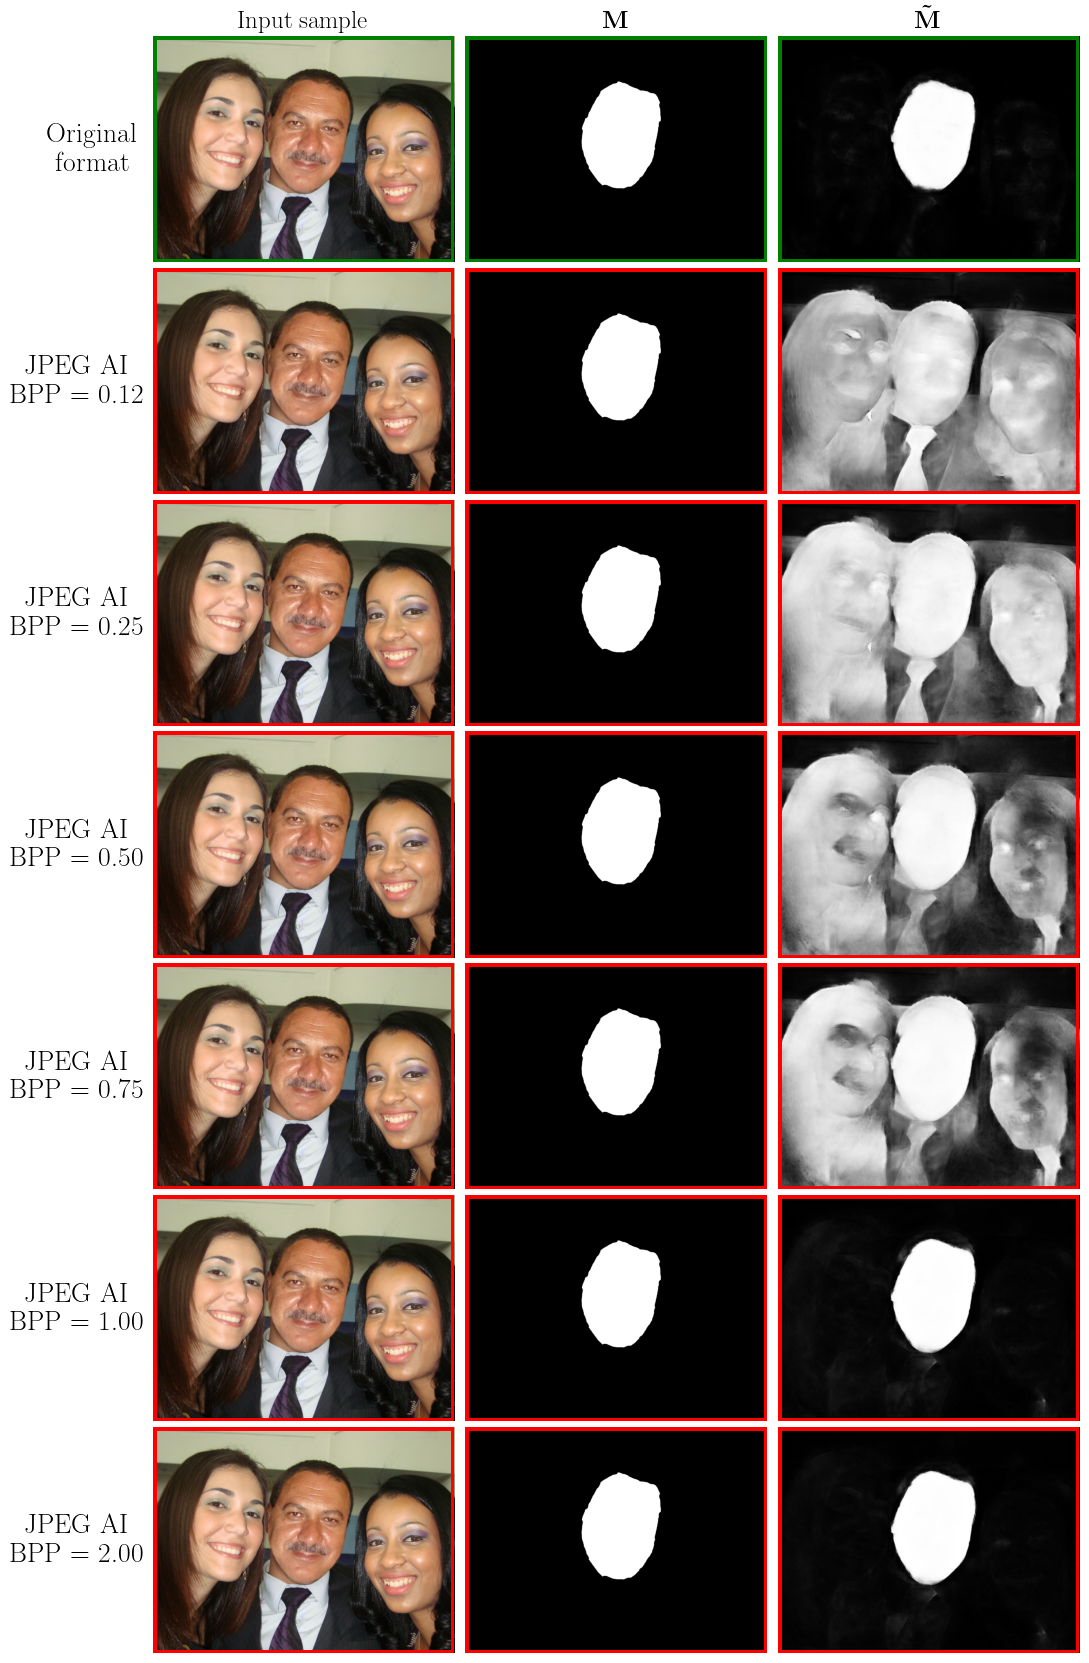

In [192]:
import matplotlib.patches as patches

unc_df = pd.read_csv(os.path.join(results_dir, 'Uncompressed', 'results.csv'), index_col=[0, 1])
jpegai_df = pd.read_csv(os.path.join(results_dir, 'JPEGAI', 'results.csv'), index_col=[0, 1])
filename = 'splicing-99'
samples = jpegai_df.loc[jpegai_df['filename']==filename]
fig, axs = plt.subplots(len(samples['target_bpp'].unique())+1, 3, figsize=(12, 3*(len(samples['target_bpp'].unique())+1)))

# Plot everything
for idx, bpp in enumerate(sorted(samples['target_bpp'].unique())):
    # Load sample
    row = samples.loc[samples['target_bpp']==bpp]
    img = Image.open(row.index.values[0][1])
    gt = Image.open(row['gt'].item()).convert('L')
    gt = np.array(gt) < 0.1  # convert as DSO-1 masks are swapped
    mask = np.load(os.path.join(results_root, row['mask_path'].item()))
    axs[idx+1][0].imshow(img), axs[idx+1][1].imshow(gt, cmap='gray'), axs[idx+1][2].imshow(mask, cmap='gray')
    axs[idx+1][0].axis('off'), axs[idx+1][1].axis('off'), axs[idx+1][2].axis('off')
    
    # Add red contour
    for ax in axs[idx+1]:
        rect = patches.Rectangle((0, 0), img.size[0], img.size[1], linewidth=5, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    
    # Add text
    axs[idx+1][0].text(-0.25, 0.5, f'JPEG AI\n BPP = {bpp:.2f}', transform=axs[idx+1][0].transAxes, fontsize=20, va='center', ha='center')

# Load original sample and mask
row = unc_df.loc[unc_df['filename']==filename]
img = Image.open(row.index.values[0][1])
mask = np.load(os.path.join(results_root, row['mask_path'].item()))
axs[0][0].imshow(img), axs[0][1].imshow(gt, cmap='gray'), axs[0][2].imshow(mask, cmap='gray')
axs[0][0].set_title('Input sample'), axs[0][1].set_title(r'$\mathbf{M}$'), axs[0][2].set_title(r'$\mathbf{\tilde{M}}$')
axs[0][0].axis('off'), axs[0][1].axis('off'), axs[0][2].axis('off')

# Add green contour to the first row
for ax in axs[0]:
    rect = patches.Rectangle((0, 0), img.size[0], img.size[1], linewidth=5, edgecolor='g', facecolor='none')
    ax.add_patch(rect)

# Add text to the first row
axs[0][0].text(-0.2, 0.5, 'Original\n format', transform=axs[0][0].transAxes, fontsize=20, va='center', ha='center')

# Adjust the space between rows 
#fig.tight_layout()
fig.subplots_adjust(hspace=0.025, wspace=0.025)
plt.show()


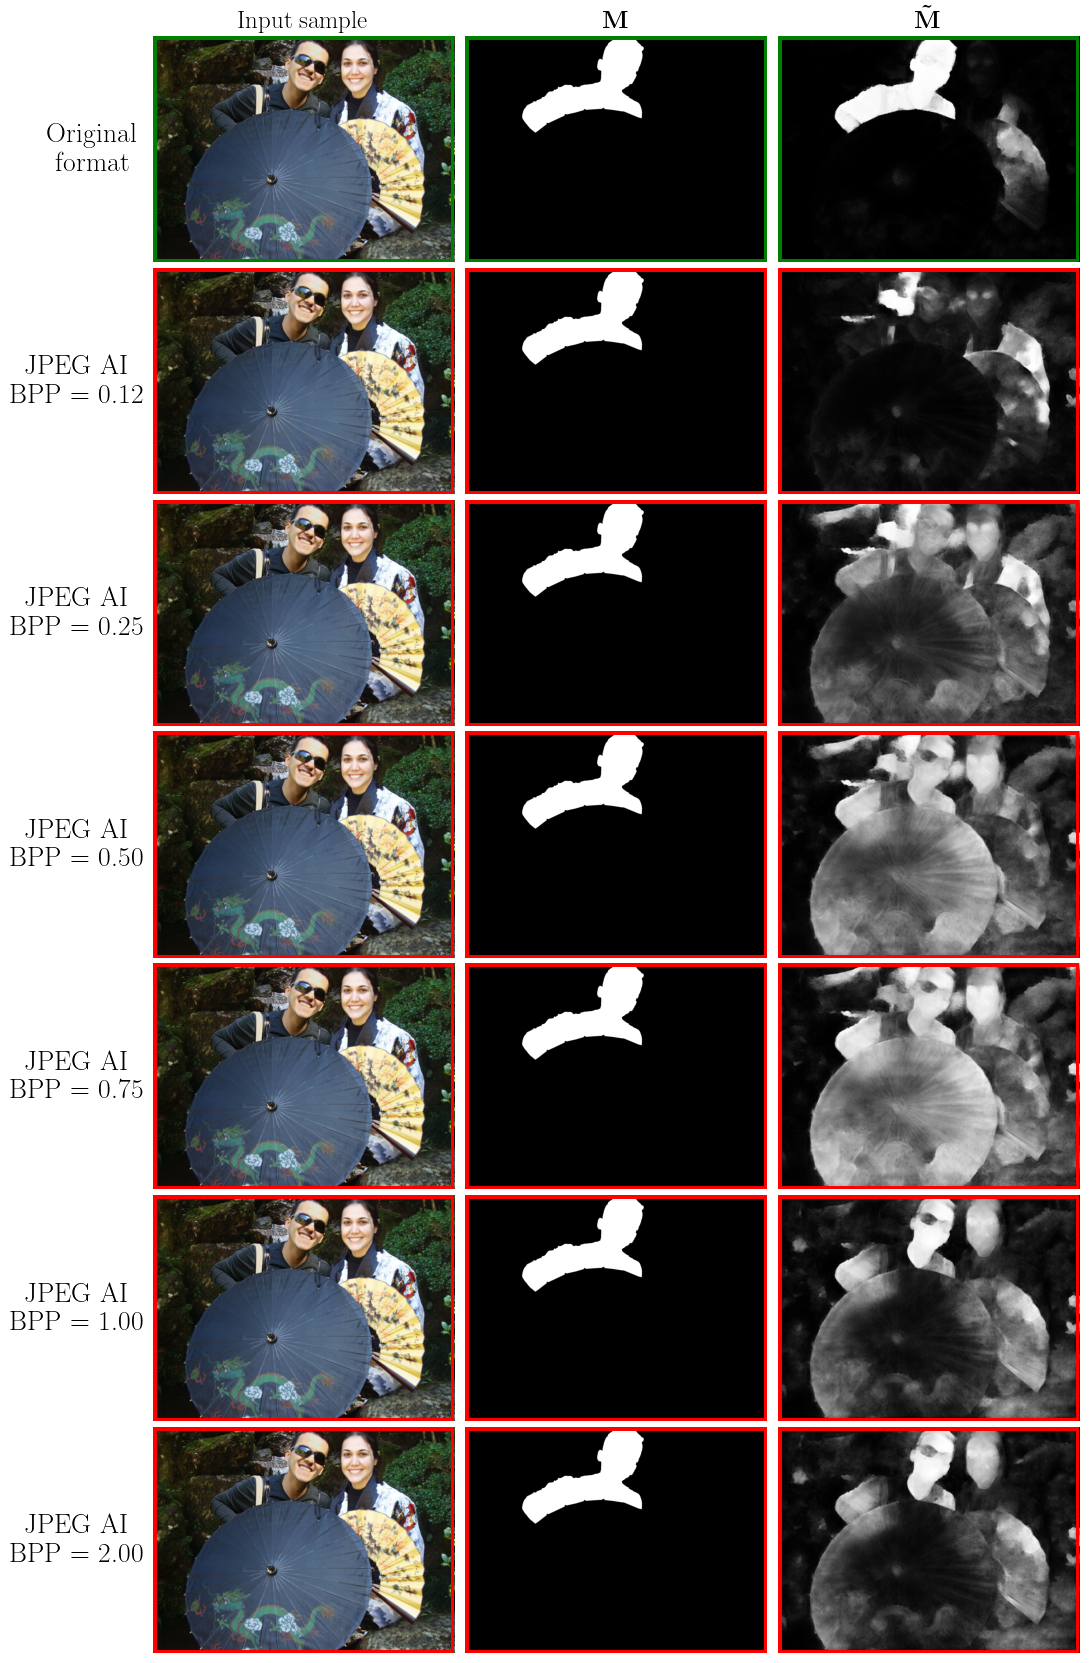

In [193]:
import matplotlib.patches as patches

unc_df = pd.read_csv(os.path.join(results_dir, 'Uncompressed', 'results.csv'), index_col=[0, 1])
jpegai_df = pd.read_csv(os.path.join(results_dir, 'JPEGAI', 'results.csv'), index_col=[0, 1])
filename = 'splicing-34'
samples = jpegai_df.loc[jpegai_df['filename']==filename]
fig, axs = plt.subplots(len(samples['target_bpp'].unique())+1, 3, figsize=(12, 3*(len(samples['target_bpp'].unique())+1)))

# Plot everything
for idx, bpp in enumerate(sorted(samples['target_bpp'].unique())):
    # Load sample
    row = samples.loc[samples['target_bpp']==bpp]
    img = Image.open(row.index.values[0][1])
    gt = Image.open(row['gt'].item()).convert('L')
    gt = np.array(gt) < 0.1  # convert as DSO-1 masks are swapped
    mask = np.load(os.path.join(results_root, row['mask_path'].item()))
    axs[idx+1][0].imshow(img), axs[idx+1][1].imshow(gt, cmap='gray'), axs[idx+1][2].imshow(mask, cmap='gray')
    axs[idx+1][0].axis('off'), axs[idx+1][1].axis('off'), axs[idx+1][2].axis('off')
    
    # Add red contour
    for ax in axs[idx+1]:
        rect = patches.Rectangle((0, 0), img.size[0], img.size[1], linewidth=5, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    
    # Add text
    axs[idx+1][0].text(-0.25, 0.5, f'JPEG AI\n BPP = {bpp:.2f}', transform=axs[idx+1][0].transAxes, fontsize=20, va='center', ha='center')

# Load original sample and mask
row = unc_df.loc[unc_df['filename']==filename]
img = Image.open(row.index.values[0][1])
mask = np.load(os.path.join(results_root, row['mask_path'].item()))
axs[0][0].imshow(img), axs[0][1].imshow(gt, cmap='gray'), axs[0][2].imshow(mask, cmap='gray')
axs[0][0].set_title('Input sample'), axs[0][1].set_title(r'$\mathbf{M}$'), axs[0][2].set_title(r'$\mathbf{\tilde{M}}$')
axs[0][0].axis('off'), axs[0][1].axis('off'), axs[0][2].axis('off')

# Add green contour to the first row
for ax in axs[0]:
    rect = patches.Rectangle((0, 0), img.size[0], img.size[1], linewidth=5, edgecolor='g', facecolor='none')
    ax.add_patch(rect)

# Add text to the first row
axs[0][0].text(-0.2, 0.5, 'Original\n format', transform=axs[0][0].transAxes, fontsize=20, va='center', ha='center')

# Adjust the space between rows 
#fig.tight_layout()
fig.subplots_adjust(hspace=0.025, wspace=0.025)
plt.show()


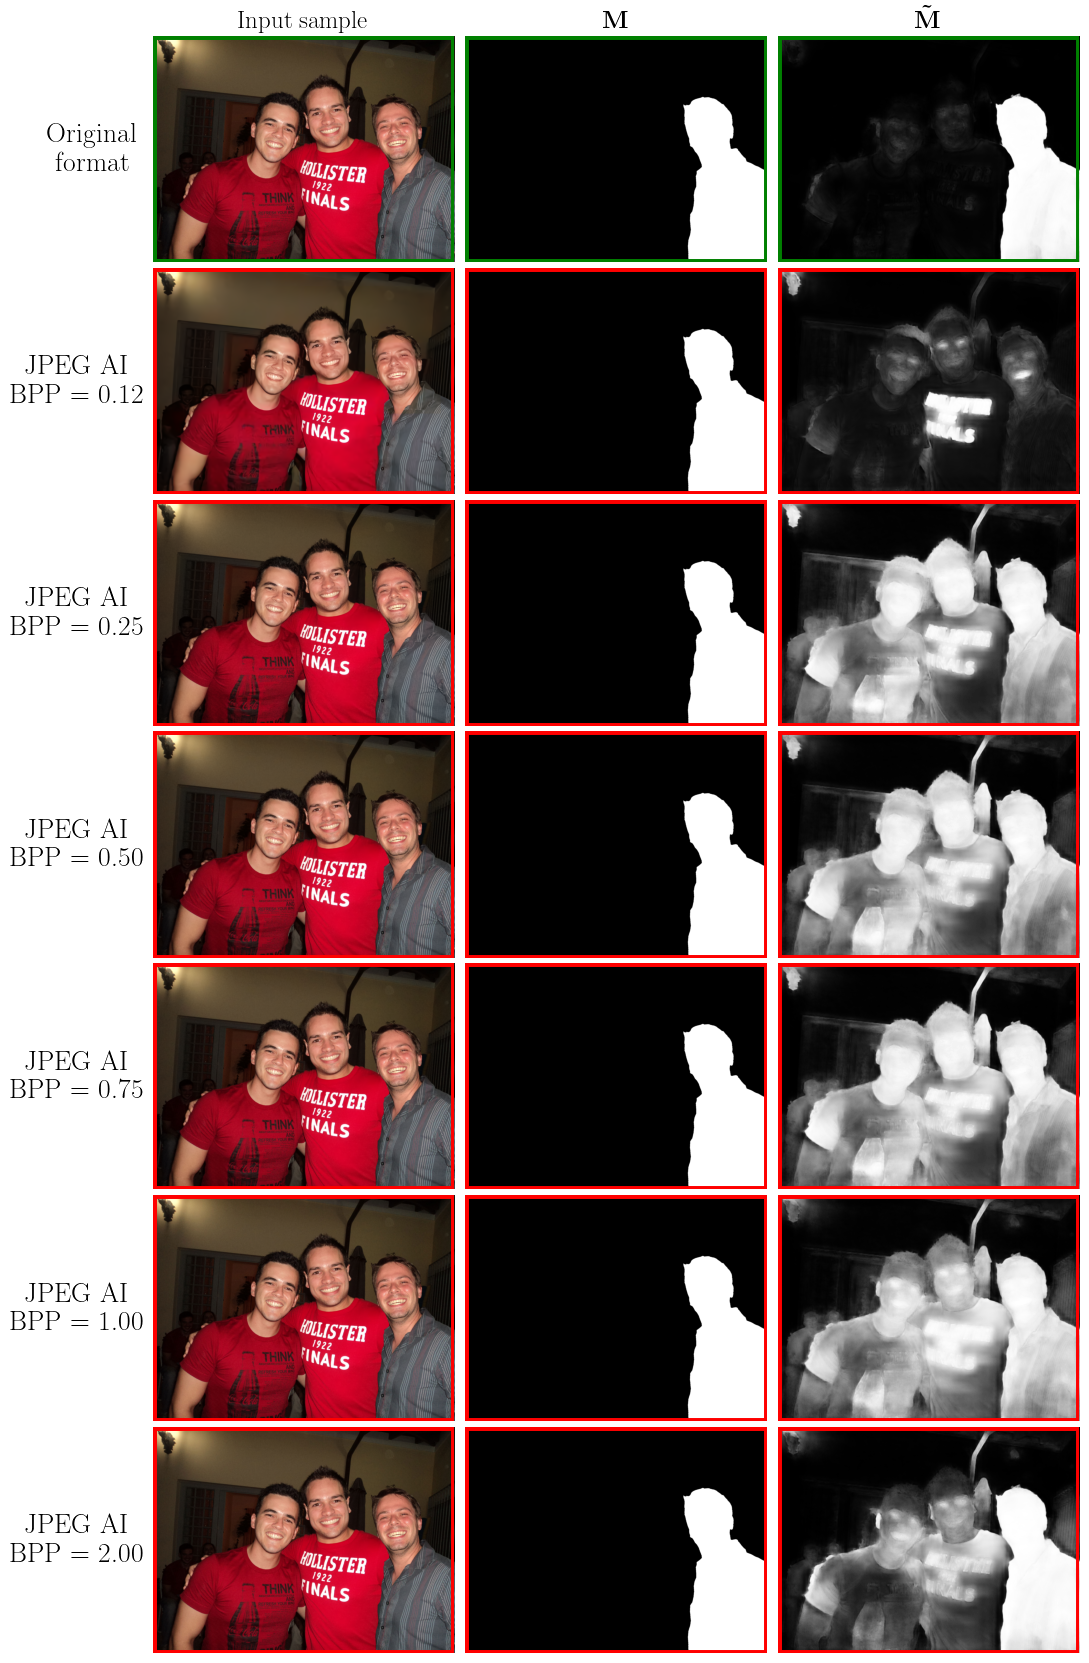

In [194]:
import matplotlib.patches as patches

unc_df = pd.read_csv(os.path.join(results_dir, 'Uncompressed', 'results.csv'), index_col=[0, 1])
jpegai_df = pd.read_csv(os.path.join(results_dir, 'JPEGAI', 'results.csv'), index_col=[0, 1])
filename = 'splicing-12'
samples = jpegai_df.loc[jpegai_df['filename']==filename]
fig, axs = plt.subplots(len(samples['target_bpp'].unique())+1, 3, figsize=(12, 3*(len(samples['target_bpp'].unique())+1)))

# Plot everything
for idx, bpp in enumerate(sorted(samples['target_bpp'].unique())):
    # Load sample
    row = samples.loc[samples['target_bpp']==bpp]
    img = Image.open(row.index.values[0][1])
    gt = Image.open(row['gt'].item()).convert('L')
    gt = np.array(gt) < 0.1  # convert as DSO-1 masks are swapped
    mask = np.load(os.path.join(results_root, row['mask_path'].item()))
    axs[idx+1][0].imshow(img), axs[idx+1][1].imshow(gt, cmap='gray'), axs[idx+1][2].imshow(mask, cmap='gray')
    axs[idx+1][0].axis('off'), axs[idx+1][1].axis('off'), axs[idx+1][2].axis('off')
    
    # Add red contour
    for ax in axs[idx+1]:
        rect = patches.Rectangle((0, 0), img.size[0], img.size[1], linewidth=5, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    
    # Add text
    axs[idx+1][0].text(-0.25, 0.5, f'JPEG AI\n BPP = {bpp:.2f}', transform=axs[idx+1][0].transAxes, fontsize=20, va='center', ha='center')

# Load original sample and mask
row = unc_df.loc[unc_df['filename']==filename]
img = Image.open(row.index.values[0][1])
mask = np.load(os.path.join(results_root, row['mask_path'].item()))
axs[0][0].imshow(img), axs[0][1].imshow(gt, cmap='gray'), axs[0][2].imshow(mask, cmap='gray')
axs[0][0].set_title('Input sample'), axs[0][1].set_title(r'$\mathbf{M}$'), axs[0][2].set_title(r'$\mathbf{\tilde{M}}$')
axs[0][0].axis('off'), axs[0][1].axis('off'), axs[0][2].axis('off')

# Add green contour to the first row
for ax in axs[0]:
    rect = patches.Rectangle((0, 0), img.size[0], img.size[1], linewidth=5, edgecolor='g', facecolor='none')
    ax.add_patch(rect)

# Add text to the first row
axs[0][0].text(-0.2, 0.5, 'Original\n format', transform=axs[0][0].transAxes, fontsize=20, va='center', ha='center')

# Adjust the space between rows 
#fig.tight_layout()
fig.subplots_adjust(hspace=0.025, wspace=0.025)
plt.show()


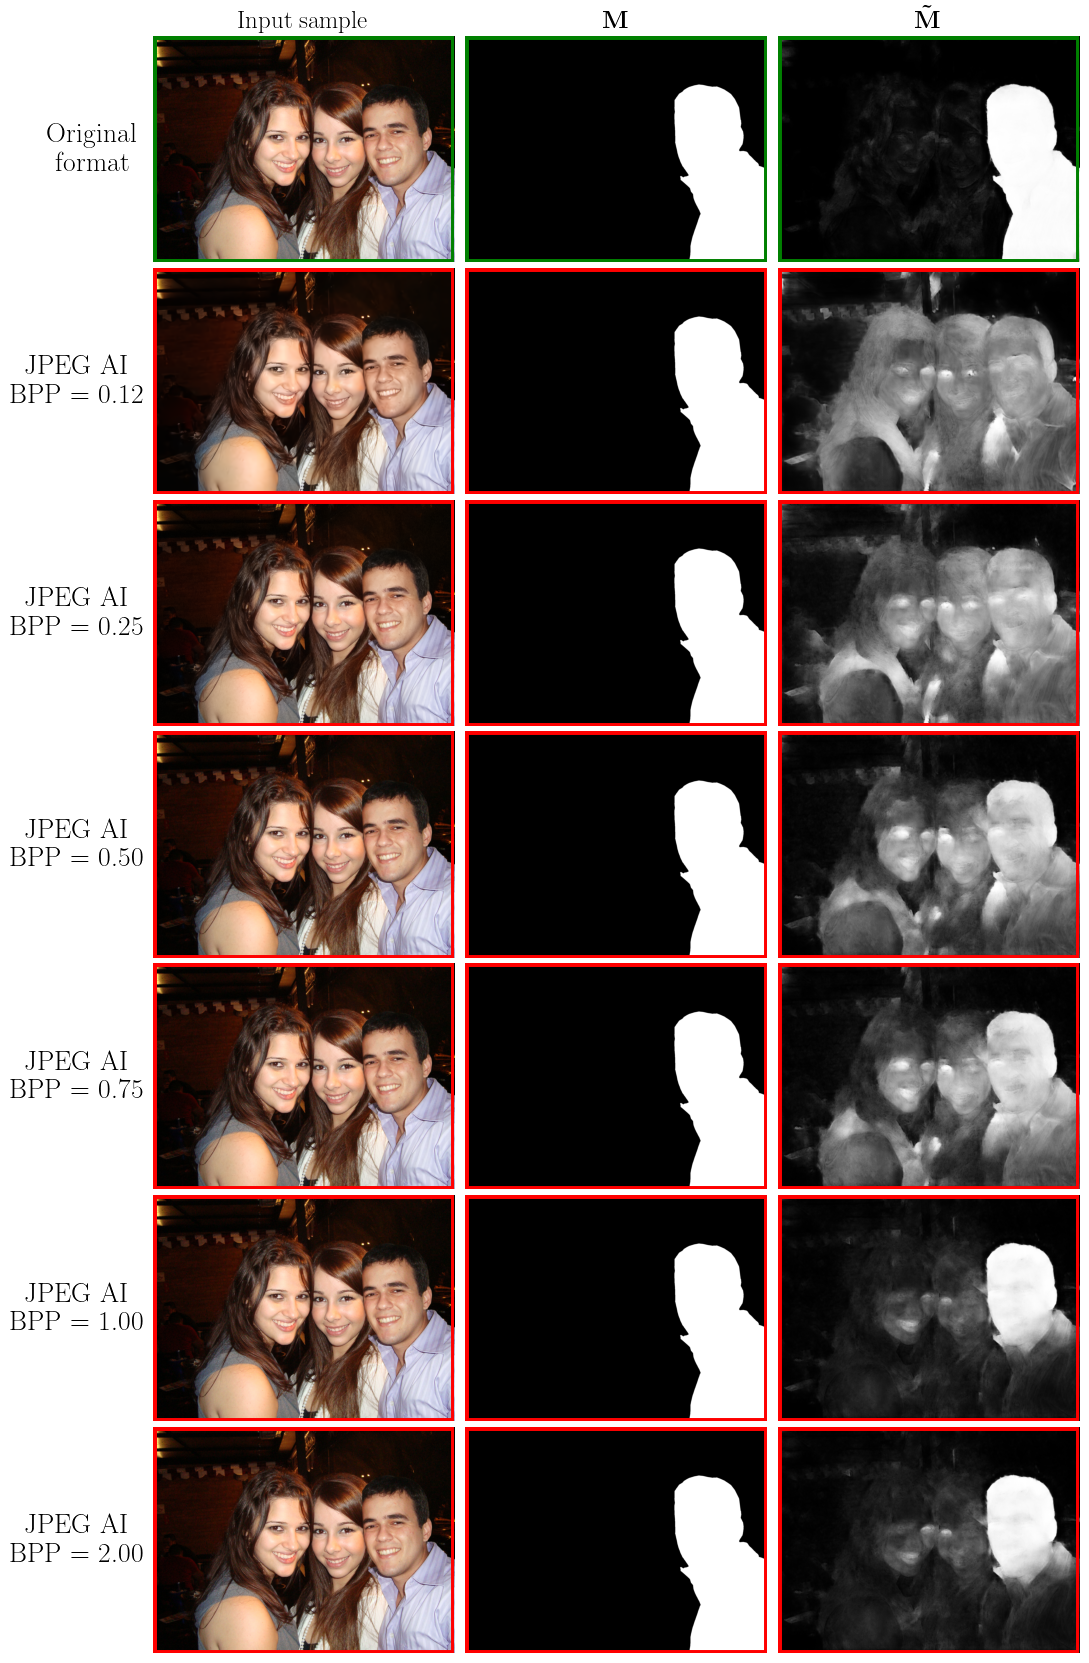

In [195]:
import matplotlib.patches as patches

unc_df = pd.read_csv(os.path.join(results_dir, 'Uncompressed', 'results.csv'), index_col=[0, 1])
jpegai_df = pd.read_csv(os.path.join(results_dir, 'JPEGAI', 'results.csv'), index_col=[0, 1])
filename = 'splicing-71'
samples = jpegai_df.loc[jpegai_df['filename']==filename]
fig, axs = plt.subplots(len(samples['target_bpp'].unique())+1, 3, figsize=(12, 3*(len(samples['target_bpp'].unique())+1)))

# Plot everything
for idx, bpp in enumerate(sorted(samples['target_bpp'].unique())):
    # Load sample
    row = samples.loc[samples['target_bpp']==bpp]
    img = Image.open(row.index.values[0][1])
    gt = Image.open(row['gt'].item()).convert('L')
    gt = np.array(gt) < 0.1  # convert as DSO-1 masks are swapped
    mask = np.load(os.path.join(results_root, row['mask_path'].item()))
    axs[idx+1][0].imshow(img), axs[idx+1][1].imshow(gt, cmap='gray'), axs[idx+1][2].imshow(mask, cmap='gray')
    axs[idx+1][0].axis('off'), axs[idx+1][1].axis('off'), axs[idx+1][2].axis('off')
    
    # Add red contour
    for ax in axs[idx+1]:
        rect = patches.Rectangle((0, 0), img.size[0], img.size[1], linewidth=5, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    
    # Add text
    axs[idx+1][0].text(-0.25, 0.5, f'JPEG AI\n BPP = {bpp:.2f}', transform=axs[idx+1][0].transAxes, fontsize=20, va='center', ha='center')

# Load original sample and mask
row = unc_df.loc[unc_df['filename']==filename]
img = Image.open(row.index.values[0][1])
mask = np.load(os.path.join(results_root, row['mask_path'].item()))
axs[0][0].imshow(img), axs[0][1].imshow(gt, cmap='gray'), axs[0][2].imshow(mask, cmap='gray')
axs[0][0].set_title('Input sample'), axs[0][1].set_title(r'$\mathbf{M}$'), axs[0][2].set_title(r'$\mathbf{\tilde{M}}$')
axs[0][0].axis('off'), axs[0][1].axis('off'), axs[0][2].axis('off')

# Add green contour to the first row
for ax in axs[0]:
    rect = patches.Rectangle((0, 0), img.size[0], img.size[1], linewidth=5, edgecolor='g', facecolor='none')
    ax.add_patch(rect)

# Add text to the first row
axs[0][0].text(-0.2, 0.5, 'Original\n format', transform=axs[0][0].transAxes, fontsize=20, va='center', ha='center')

# Adjust the space between rows 
#fig.tight_layout()
fig.subplots_adjust(hspace=0.025, wspace=0.025)
plt.show()
